<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-1-begin-modeling-process/U2_S4_D1_Begin_Modeling_process_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install category_encoders

In [0]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_absolute_error
from pandas.api.types import is_numeric_dtype    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [0]:
#Silent Data Conversion Warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### NYC Weather Data - climatology baseline

In [0]:
url = 'https://raw.githubusercontent.com/zonination/weather-us/master/nyc.csv'
nyc_weather = pd.read_csv(url, parse_dates=['Date']).set_index('Date').drop(['Unnamed: 0', 'Max.Gust.SpeedMPH', 'Events'], axis=1)

In [0]:
nyc_weather.head()

,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,Min.Humidity,Max.Sea.Level.PressureIn,...,Max.VisibilityMiles,Mean.VisibilityMiles,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees.br...,city,season
Date,,,,,,,,,,,,,,,,,,,,,
1948-07-01,84,78.0,72,71,65,58,93,65,46,30.07,...,10.0,7.0,2.0,16,8,0.00,0.0,264<br />,New York City (USA),Summer
1948-07-02,82,72.0,63,62,53,49,76,51,33,30.20,...,15.0,14.0,10.0,16,10,0.00,0.0,315<br />,New York City (USA),Summer
1948-07-03,78,71.0,64,66,58,53,84,62,42,30.17,...,15.0,10.0,5.0,14,6,0.00,0.0,203<br />,New York City (USA),Summer
1948-07-04,84,76.0,68,68,63,56,90,67,38,30.13,...,15.0,7.0,2.0,12,5,0.00,0.0,198<br />,New York City (USA),Summer
1948-07-05,93,82.0,70,74,69,65,93,71,40,30.12,...,10.0,6.0,3.0,18,8,0.00,0.0,218<br />,New York City (USA),Summer


In [0]:
nyc_weather.isna().sum()

Over the years, the average daily low temperature in NYC is about 47F

In [0]:
nyc_weather['Min.TemperatureF'].mean()

47.29458469055375

The predicted temperature values deviate from the average by about 14 degrees on average

In [0]:
predicted = [nyc_weather['Min.TemperatureF'].mean()] * len(nyc_weather)
mean_absolute_error(nyc_weather['Min.TemperatureF'], predicted)

14.002022219731774

###NYC Weather - persistence baseline

In [29]:
nyc_weather['min_yesterday'] = nyc_weather['Min.TemperatureF'].shift(1)
nyc_weather.dropna(inplace=True)
mean_absolute_error(nyc_weather['Min.TemperatureF'], nyc_weather['min_yesterday'])

4.193198529411765

Yay! The baseline is off less by 10 degrees on average

### NYC Weather - combined baseline

In [0]:
nyc_weather['mean_temp'] = [nyc_weather['Min.TemperatureF'].mean()] * len(nyc_weather)

In [0]:
nyc_weather['Average'] = (nyc_weather['mean_temp'] + nyc_weather['min_yesterday'])/2

Averaging the climatology and persistence methods did not help, persistence baseline stays the most accurate for NYC weather

In [34]:
mean_absolute_error(nyc_weather['Min.TemperatureF'], nyc_weather['Average'])

7.634351515192473

### Bank marketing

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
%cd bank-additional

In [0]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')
X = bank.drop(columns='y')
y = bank['y'] == 'yes'

In [0]:
def unique(df):
  for col in df.columns:
    print(col, df[col].unique())
    
unique(bank)    

In [0]:
bank.replace('unknown', np.nan, inplace=True)
bank.dropna(inplace=True)
bank.isna().sum()

In [0]:
def train_validation_test_split(
    X, y, train_size=0.8, val_size=0.1, test_size=0.1, 
    random_state=None, shuffle=True):
  
    from sklearn.model_selection import train_test_split

    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
#     print(val_size/(train_size+val_size))
#     print(test_size)
#     print(train_size)
#     print(train_size+test_size+val_size)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [0]:
#First, try the model without shuffling the data
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle=False)

In [147]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='newton-cg')
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
accuracy_score(y_val, y_pred)

0.85360524399126

The accuracy pretty well, let's see the accuracy with shuffling

In [0]:
X_train_t, X_val_t, X_test_t, y_train_t, y_val_t, y_test_t = train_validation_test_split(
    X, y, shuffle=True)

In [149]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='newton-cg')
)

pipeline.fit(X_train_t, y_train_t)
y_pred_t = pipeline.predict(X_val_t)
accuracy_score(y_val_t, y_pred_t)

0.9082301529497451

shuffling data helped to increase the model accuracy by 5% on average

Visualize the coefficients

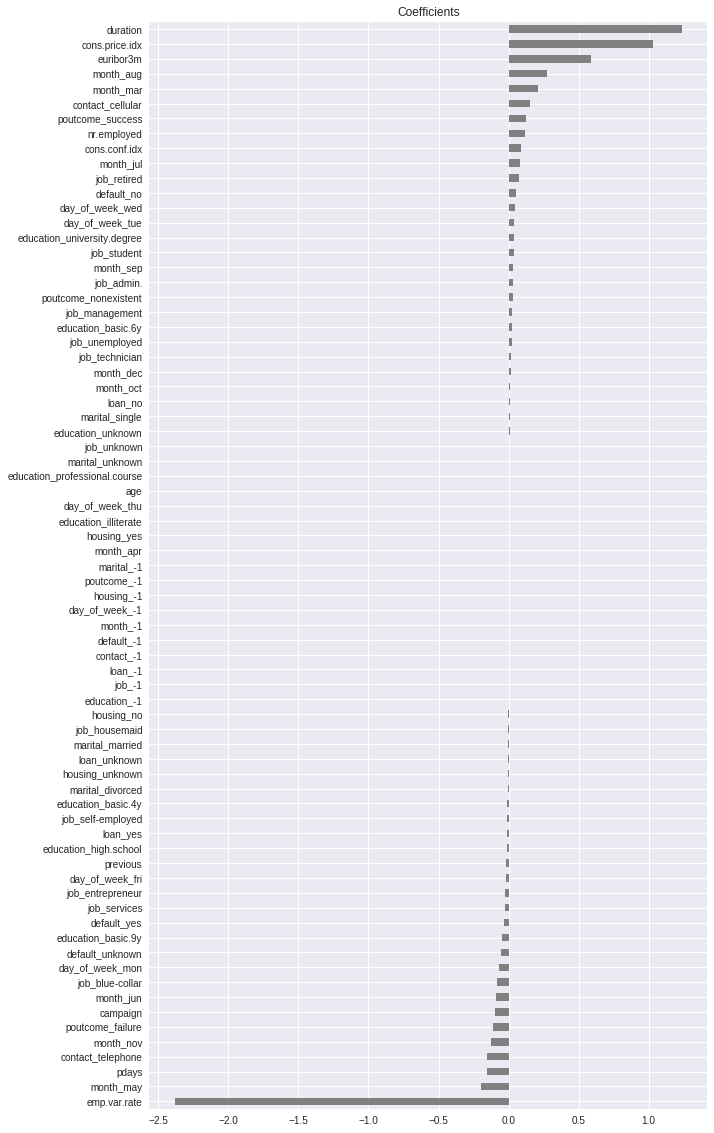

In [150]:
plt.figure(figsize=(10,20))
plt.title('Coefficients')

coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train_t).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='gray');


In [0]:
pipeline.named_steps

In [0]:
#employment variation rate is strongly negatively correlated with 
#the success rate, let's try to remove it
# bank['emp.var.rate'].value_counts()
# bank.drop('emp.var.rate', axis=1, inplace=True)

# X_train_t, X_val_t, X_test_t, y_train_t, y_val_t, y_test_t = train_validation_test_split(
#     X, y, shuffle=True)
# pipeline = make_pipeline(
#     ce.OneHotEncoder(use_cat_names=True),
#     StandardScaler(),
#     LogisticRegression(solver='newton-cg')
# )

# pipeline.fit(X_train, y_train)
# y_pred_t = pipeline.predict(X_val)
# accuracy_score(y_val, y_pred)

Actually, taking the category out of the dataset decreased the model accuracy, but might be useful for the business

Let's try the pipeline using ColumnTransformer and GridSearchCV

In [0]:

def pipeline(num_features, cat_features, num_imp, missing, solver='lbfgs', cv=10):
  
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy=num_imp)),
      ('scaler', StandardScaler())])

  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value=missing)),
      ('onehot', OneHotEncoder(handle_unknown='ignore'))])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)])

  # Append classifier to preprocessing pipeline.Now we have a full prediction pipeline.
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver=solver))])
  
  param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
  }

  grid_search = GridSearchCV(clf, param_grid, cv=cv, iid=False)
  
  return grid_search

In [0]:
bank.columns

In [0]:
bank_numeric = ['age', 'duration', 'campaign', 'pdays', 'previous', 
       'poutcome', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

bank_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome']

X_train_t, X_val_t, X_test_t, y_train_t, y_val_t, y_test_t = train_validation_test_split(
    X, y, shuffle=True)

In [140]:
grid_search_bank = pipeline(bank_numeric, bank_categorical, 'median', 'missing', 'newton-cg')
grid_search_bank.fit(X_train_t, y_train_t)

y_pred_grid = grid_search_bank.predict(X_val_t)
accuracy_score(y_val_t, y_pred_grid)

0.7480916030534351

From the result above it's clear the previous pipeline was much more efficient for this dataset

### Example pipeline for the Titanic dataset

In [0]:
from __future__ import print_function

import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [0]:
# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.

def pipeline(num_features, cat_features, num_imp, missing, solver='lbfgs', cv=10):
  
  numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy=num_imp)),
      ('scaler', StandardScaler())])

  categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='constant', fill_value=missing)),
      ('onehot', OneHotEncoder(handle_unknown='ignore'))])

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numeric_transformer, numeric_features),
          ('cat', categorical_transformer, categorical_features)])

  # Append classifier to preprocessing pipeline.Now we have a full prediction pipeline.
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver=solver))])
  
  param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
  }

  grid_search = GridSearchCV(clf, param_grid, cv=cv, iid=False)
  
  return grid_search

In [132]:
numeric_features = ['age', 'fare']
categorical_features = ['embarked', 'sex', 'pclass']
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


grid_search = pipeline(numeric_features, categorical_features, 'median', 'missing')
grid_search.fit(X_train, y_train)
print(("best logistic regression from grid search: %.3f"
         % grid_search.score(X_test, y_test)))

best logistic regression from grid search: 0.798
